## 神经网络用于计算机视觉

本章包括以下内容：

- 理解卷积神经网络（ConvNet）
- 使用数据增强（data argument）来降低过拟合
- 使用预训练的CNN进行特征提取
- 微调预训练的CNN
- 将CNN学到的内容及其如何做出分类决策可视化

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import models, layers, optimizers, losses, metrics

model = models.Sequential()
model.add(
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [7]:
# 在MNIST上训练CNN
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.binary_accuracy])

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.1826 - binary_accuracy: 0.9893
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0464 - binary_accuracy: 0.9972
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0316 - binary_accuracy: 0.9981
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0253 - binary_accuracy: 0.9985
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0197 - binary_accuracy: 0.9988


In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 59us/step


[0.025071865859850367, 0.9985499967575073]

In [69]:
model.save('mnist_cnn1.h5')

In [68]:
results = model.predict_classes(test_images[1000:1010], batch_size=1, verbose=1)

10/10 [==============================] - 0s 920us/step


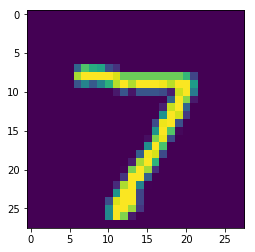

In [55]:
plt.imshow(test_images[0].reshape(28, 28))
plt.show()

In [35]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)